# Regressão Linear com gradiente descendente

Métodos iterativos de otimização são usadas em aprendizado de máquina em toda a parte. Aqui, nós vamos olhar o método de gradiente descendente, o método mais popular para treinar redes neurais artificiais. Em se tratando de uma simples regressão linear, o método de gradiente descendente só é recomendado quantdo temos dados com muitas dimensões. Nesse caso, a inversão da matriz $\pmb{X}^T\pmb{X}$ começa a demorar muito e resolver regressão linear pela fórmula analítica $\pmb{\hat{w}} = (\pmb{X}^T \pmb{X})^{-1} \pmb{X}^T \pmb{y}$ não vale mais a pena. 

Nós também veremos um pouco de regimes de aprendizado online e em lotes (*mini-batch learning*) e discutiremos como esses regimes podem ser usados para aprender utilizando bases gigantescas que não são possíveis de carregar de uma só vez para o RAM do computador (e.g. bases com +/- 20 GB).

Para melhor entendimento do algoritmo de otimização, é mais interessante começar usando-o em um problema mais simples, então vamos introduzir o algorítmo com um problema de regresão linear simples, com apenas uma variável na matrix de dados $\pmb{X}$.


## Pré-requisitos

É preciso ter um conhecimento básico de Python, incluindo o mínimo de Python orientado à objetos. Caso não saiba programar, os cursos de [Introdução à Ciencia da Computação](https://br.udacity.com/course/intro-to-computer-science--cs101/) e [Fundamentos de Programação com Python](https://br.udacity.com/course/programming-foundations-with-python--ud036/) fornecem uma base suficiente sobre programação em Python e Python orientado à objetos, respectivamente. Além disso, é necessário ter conhecimento das bibliotecas de manipulação de dados Pandas e Numpy. Alguns bons tutoriais são o [Mini-curso 1](https://br.udacity.com/course/machine-learning-for-trading--ud501/) do curso de Aprendizado de Máquina para Negociação, o site [pythonprogramming.net](https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/) ou o primeiro curso do DataCamp em [Python](https://www.datacamp.com/getting-started?step=2&track=python).

Para entender o desenvolvimento do algoritmo de regressão linear é preciso ter o conhecimento de introdução à álgebra linear. Na UnB, a primeira parte do curso de Economia Quantitativa 1 já cobre o conteúdo necessário. Caso queira relembrar ou aprender esse conteúdo, o curso online do MIT de [Introdução à Álgebra Linear](https://www.youtube.com/playlist?list=PLE7DDD91010BC51F8) fornece uma boa base sobre a matemática que será desenvolvida nos algoritmos de aprendizado de máquina.

Conhecimento de cálculo e principalmente otimização é fundamental para o entendimento dos algoritmos de aprendizado de máquina, que muitas vezes são encarados explicitamente como problemas de otimização. Uma noção de cálculo multivariado também ajudará na compreensão dos algoritmos, visto que muitas vezes otimizaremos em várias direções.


## Intuição e explicação matemática

Vamos utilizar um exemplo de regressão linear bastante simples, com apenas uma variável dependente e uma independente. A relação entre eleas pode ser expressa na equação $\pmb{y} = b +  \pmb{x} w + \pmb{\epsilon}$ e nós queremos achar os valores $\hat{b}$ e $\hat{w}$ que minimizam a norma do vetor $\pmb{\epsilon}$, isto é, minimizamos a soma dos quadrados dos resíduos.

A idea pro trás dos métodos iterativos de otimização é bastante simples: nós começamos com algum chute razoável para os valores de $\hat{b}$ e $\hat{w}$ e vamos atualizando-os na direção certa até que chegamos no valor mínimo da nossa função custo, nesse caso, $||\pmb{\hat{\epsilon}}||^2$. 

Matematicamente, nós temos que perceber que a nossa função custo, $||\pmb{\hat{\epsilon}}||^2$, é uma função de $\hat{b}$ e $\hat{w}$:

$$L(\hat{b}, \hat{w})=||\pmb{\hat{\epsilon}}||^2 = \sum{\epsilon}^2 \\=
\sum{(\hat{y}} - y)^2 \\=
\sum{(\hat{b} + x\hat{w}} - y)^2$$

E que, portanto, podemos minimizá-la nesses dois parâmetros usando cálculo multivariado. Essa função custo - especifica de regressão linear - é uma função convexa, o que quer dizer que ela o único ponto de mínimo que ela tém é um mínimo global. Em outras palavras, a função custo pode ser vista como uma tigela, e o gradiente dessa função nós apontará a direção de descida mais ingrime nas direções $\hat{b}$ e $\hat{w}$, de forma que possamos chegar ao fundo da tigela, onde está o ponto de menor custo. Para implementar o gradiente descendente, basta atualizar **simultaneamente** os valores de $\hat{b}$ e $\hat{w}$, adicionando a eles as respectivas derivadas parciais da função custo vezes uma taxa de aprendizado $\alpha$ (o sinal $:=$ significa atualizar):

$$\hat{b} := \hat{b} + \alpha \frac{\partial}{\partial \hat{b}}L(\hat{b}, \hat{w})$$

$$\hat{w} := \hat{w} + \alpha \frac{\partial}{\partial \hat{w}}L(\hat{b}, \hat{w})$$

 Ou, no caso específico da nossa função custo de soma dos erros quadrados:

$$\hat{b} := \hat{b} + \alpha \frac{1}{2} \sum{(\hat{b} + \hat{w} x - y)} $$

$$\hat{w} := \hat{w} + \alpha \frac{1}{2} \sum{((\hat{b} + \hat{w} x - y) x)} $$

Se quisermos simplificar, podemos retirar da fórmula $\frac{1}{2}$ que não fará diferença, uma vez que as derivadas já estão sendo multiplicadas por uma constante $\alpha$. Se quisermos simplificar a notação mais ainda, podemos utilizar a de vetores:

$$\pmb{\hat{w}} := \pmb{\hat{w}} + \alpha  \nabla(L)) $$

Em que $\pmb{\hat{w}}$ é o vetor dos parâmetros da regressão linear, incluindo o intercepto $\hat{b}$. Note que esse última regra de atualização é geral para qualquer número de dimensões que tenham nossos dados.

E pronto. É só isso. Simples assim!

## Visualizando gradiente descendente

Para entender melhor como funciona o algoritmo de gradiente descendente, vamos simular alguns dados com uma relação conhecida, de forma que possamos ver gradiente descendente em ação. Nós vamos trabalhar com uma regressão linear bem simples, com apenas dois parâmetros para aprender: o intercepto $\hat{b}$ e a inclinação com respeito a única variável, $\hat{w}$.

Particularmente, vamos gerar dados x e y de forma que $y = 5 + 3x + \epsilon$, em que $\epsilon$ é algum erro aleatório. Nós sabemos que os valores ótimos de $\hat{w}$ e $\hat{b}$ seriam então 3 e 2, respectivamente, então poderemos vêr quão perto deles chegarão os parâmetros aprendidos por gradiente descendente. 

Vizualmente, se plotarmos os pares (x,y) teremos um gráfico como o abaixo. A nossa esperança é que a técnica de gradiente descendente consiga achar uma reta que melhor se encaixa nestes dados.

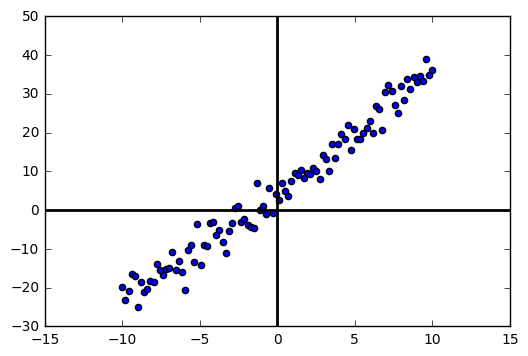

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from matplotlib import pyplot as plt

dados = pd.DataFrame()
dados['x'] = np.linspace(-10,10,100)
dados['y'] = 5 + 3*dados['x'] + np.random.normal(0,3,100)

plt.scatter(dados['x'], dados['y'])
plt.axhline(y=0, linewidth=2, color = 'k')
plt.axvline(x=0, linewidth=2, color = 'k')
plt.show()

Antes de implementar a regressão linear por gradiente descendente, é uma boa vizualizar como é a nossa função custo quando plotada nas duas dimenções dos parâmetros $\hat{b}$ e $\hat{w}$ que queremos aprender:

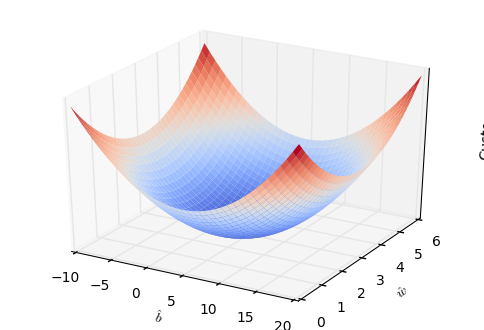

In [2]:
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# %matplotlib notebook

# define a função custo
def L(y, y_hat):
    return ((y-y_hat) ** 2).sum()

# define valores de b_hat e w_hat
b_hat, w_hat = np.linspace(-10,20,40), np.linspace(0,6,40)

# acha o custo para cada combinação de b_hat e w_hat
loss = np.array([L(dados['y'], i + j * dados['x']) for i in b_hat for j in w_hat]).reshape(40,40)
b_hat, w_hat = np.meshgrid(b_hat, w_hat) # combina os b_hat e w_hat em uma grade

# faz o gráfico em 3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zticks([])
ax.set_xlabel('$\hat{b}$')
ax.set_ylabel('$\hat{w}$')
ax.set_zlabel('Custo', rotation=90)
surf = ax.plot_surface(b_hat, w_hat, loss,
                       rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
plt.show()


Como eu disse, a função de custo parece uma tigela. Se você olhar bem vai perceber como o ponto de mínimo da tigela está bem onde $\hat{b}=5$ e $\hat{w}=3$. O gradiente dessa função é simplesmente um vetor que dá a inclinação dessa tigela em cada ponto:

$$\nabla(L)=\Bigg[\frac{\partial L}{\partial \hat{b}}, \frac{\partial L}{\partial \hat{w}} \Bigg]$$

Se nós seguirmos na direção oposta do gradiente, então chegaremos no ponto de mínimo. Podemos traçar uma analogia com uma bolinha de gude sendo solta em uma tigela: a bolinha descerá na direção mais inclinada e eventualmente parará no ponto mais baixo da tigela. Há uma importande diferença no entando. Quando falamos de uma bolinha de gude desliando para o fundo de uma tigela, podemos visualizar a bolinha começando com uma pequena velocidade e acelerando ao longo do trajeto. Com gradiente descendento ocorre o oposto: inicialmente, os parâmetros $\hat{b}$ e $\hat{w}$ caminham rapidamente em direção ao ponto de mínimo e, quanto mais se aproximam dele, passam a caminhar cada vez mais devagar.

Mas por que isso acontece? Para enteder isso, pense em como a cada iteração os parâmetros $\hat{b}$ e $\hat{w}$ dão um passo em direção ao mínimo. O tamanho desse passo será o o valor do gradiente naquele ponto multiplicado pela constante $\alpha$. Olhe de novo para o gráfico acima e note que quanto mais próximos estamos do ponto de mínimo, menor a inclinação da função custo, **OU SEJA** menor o gradiente, **OU SEJA**, menor o passo dado em direção ao mínimo.

Essa característica do método de gradiente descendente é ao mesmo tempo boa e ruim. É ruim pois atrasa o processo de aprendizado quando chegamos próximo do mínimo, mas é boa porque nos permite uma expliração mais minuciosa em torno do mínimo de forma que possamos localizá-lo com mais precisão. Isso talvez não pareça muito importante nesse caso super simples de regressão linear com apenas dois parâmetros para aprender, mas quando estamos lidando com aprendizado de redes neurais com milhares de parâmetros e uma função custo não convexa você vai entender porque é importante essa exploração minuciosa do espaço da função custo.

Tendo dito tudo isso, vamos agora implementar a regressão linear com gradiente descentende. Note como abaixo nós nos restringimos ao caso simples para que possamos vizualizar o processo de aprendizado. Algumas pequenas mudanças são necessárias no caso de uma regressão linear com vários parâmetros para aprender.

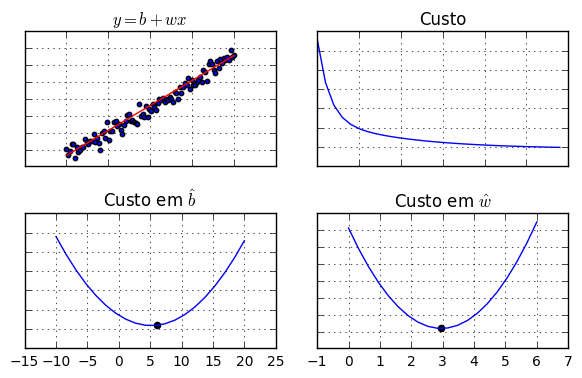

In [8]:
class linear_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=1000, show_learning=False):
        self.learning_rate = learning_rate
        self.training_iters = training_iters
        self.show_learning = show_learning

        
    def fit(self, X_train, y_train, plot=False):
        
        # formata os dados
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # para plotar o aprendizado (é preciso conhecer a equação geradora)
        if self.show_learning:
            assert X.shape[1] <= 2 # só é possível viazualizar 2 parâmetros
            self.w1_loss = [L(y_train, 5 + i * X_train) for i in np.linspace(0,6,20)]
            self.b_loss = [L(y_train, i + 3 * X_train) for i in np.linspace(-10,20,20)]
        
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,5, size = X[0].shape)
        
        loss = [] # para plotar o aprendizado
        while self.training_iters > 0:
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for point, yi in zip(X, y_train):
                gradient +=  (point * self.w_hat - yi) * point
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado
                  
            # atualiza os parâmetros
            self.w_hat -= gradient
            
            self.training_iters -= 1 # atualiza a iteração de treino
            l = ((y_train - self.predict(X_train)) ** 2).sum() # calcula o custo
                        
            loss.append(l) # armazeno o custo para gráfico
        
            if self.show_learning:
                # mostra o estado atual do aprendizado
                self._show_state(X_train, y_train, loss) 
            
        
    def predict(self, X_test):
        # formata os dados
        if len(X_test.values.shape) < 2:
            X = X_test.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        return np.dot(X, self.w_hat) 
    
    
    def _show_state(self, X_train, y_train, loss):
        # visualiza o processo de aprendizado
        lb = L(y_train, self.w_hat[0] + 3 * X_train) # calcula o custo na direção b
        lw = L(y_train, 5 + self.w_hat[1] * X_train) # calcula o custo na direção w

        # scatter plot
        plt.subplot(221)
        plt.scatter(X_train, y_train, s= 10)
        plt.plot(X_train, self.predict(X_train), c='r')
        plt.title('$y = b + w x$')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # loss
        plt.subplot(222)
        plt.plot(range(len(loss)), loss)
        plt.title('Custo')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # b_loss
        plt.subplot(223)
        plt.plot( np.linspace(-10,20,20), self.b_loss)
        plt.scatter(self.w_hat[0], lb, c = 'k')
        plt.title('Custo em $\hat{b}$')
        plt.tick_params(labelleft=False)
        plt.grid(True)
        
        # w_loss
        plt.subplot(224)
        plt.plot(np.linspace(0,6,20), self.w1_loss)
        plt.scatter(self.w_hat[1], lw, c = 'k')
        plt.title('Custo em $\hat{w}$')
        plt.grid(True)
        plt.tick_params(labelleft=False)
        
        plt.tight_layout()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico

regr = linear_regr(learning_rate=0.0005, training_iters=30, show_learning=True)
regr.fit(dados['x'], dados['y'])

Nos gráficos acima, pode ver como evolui a posição da reta que queremos encaixar nos dados (gráfico 1), o custo (gráfico 2), o parâmetro $\hat{b}$ (gráfico 3) e o parâmetro $\hat{w}$ (gráfico 4). Note como com apenas 30 iterações de treino nós conseguimos que os parâmetros aprendidos chegassem muito perto dos valores de mínimo. Nós podemos dizer com confiança que nosso algorítmo de gradiente descendente foi um sucesso!


## Hiper-parâmetros

O algorítmo de otimização iterativa por gradiente descendente é talvez o método algoritmo de aprendizado de máquina mais importante que você vai aprender: ele é extremamente poderoso, relativamente rápido e funciona nos mais diversos cenários. No entanto, tudo isso vêm a um preço e nesse caso são os hiper-parâmetros.

Diferentemente dos parâmetros $\pmb{\hat{w}}$ aprendidos durante o treinamento de uma regressão linear (ou de uma rede neural, como veremos mais afrente), os hiper-parâmetros **nãos** são aprendidos pela máquina durante o treinamento e devem ser ajustados manualmente. No caso da nossa regressão linear por gradiente descendente, podemos distinguir três hiper-parâmetros: 
* A taxa de aprendizado
* O número de iterações de treino
* Os valores iniciais de $\pmb{\hat{w}}$

No caso de regressão linear, como a função custo é conveza, não importa muito onde começamos em termos de $\pmb{\hat{w}}$, **se os outros dois hiper-parâmetros** forem ajustados corretamente. Aqui nós não vamos dar muita atenção aos valores iniciais de $\pmb{\hat{w}}$ (note como na nossa implementação eles nem foram feitos para serem ajustados e são simplesmente pequenos valores aleatórios).

Agora, os dois primeiros hiper-parâmetros são muito importantes e o sucesso ou fracasso do aprendizado depende severamente de conseguirmos ajustá-los corretamente. A **taxa de aprendizado** é definitivamente o mais importante de todos, então vamos gastar um certo tempo discutindo como ela influencia no aprendizado e como ajustá-la bem.

A taxa de aprendizado define o tamanho dos passos que daremos em direção ao mínimo em cada iretação. Se esses passos forem muito pequenos, é quase garantido que chegaremos ao ponto de mínimo da função, mas para isso talvez precisaremos de muitas iterações de treino, tornando o algorítmo desnecessáriamente lento. 

Por outro lado, se colocarmos uma taxa de aprendizado muito alta, pode acontecer de sermos catapultados para cima da função custo e irmos cada vez mais longe do mínimo, resultando em uma falha completa de aprendizado. Isso acontecerá quando o passo que dermos for tão grande que pulará o ponto de mínimo e chegará em um ponto na função custo mais alto do que o de onde saímos. Nesse novo ponto, o gradiente será ainda maior, aumentando mais ainda o passo seguinte e nos arremessando ainda mais longe do ponto de mínimo a cada iteração.

Assim, podemos ver que a taxa de aprendizado não deve ser nem tão grande, nem tão pequena. Uma sugestão de ajustamento desse hiper-parâmetro é começar com 0.01 e explorar os pontos en volta dez vezes maior/menor (isto é, 0.1 e 0.001). Ná maioria dos casos, uma boa taxa de aprendizado será algum dos segintes valores: 1, 0.1, 0.01, 0.001, 0.0001, 0.00001.

Com uma boa taxa de aprendizado, selecionar o **número de iterações de treino** é uma tarefa fácil. Mesmo assim, recomenda-se plotar o valor da função custo a cada iteração de treino, assim como fizemos no gráfico 2 acima. Dessa forma você poderá ver se a função custo já chegou está em uma região em que o seu valor não diminiu ou diminiu pouco a cada iteração. 

No nosso caso, o gráfico da função custo a cada iteração é bastante suave, mas pode acontecer de haver tanto iterações em que o custo cai quando iterações em que o custo sube. Se esse é o caso e a função custo flutua muito a cada iteração, recomenda-se baixar a taxa de aprendizado. Se a função custo desce suavemente e constantemente, mad muito devagar, recomenda-se aumentar a taxa de aprendizado.


## Gradiente descendente estocástico: aprendizado por mini-lotes e online



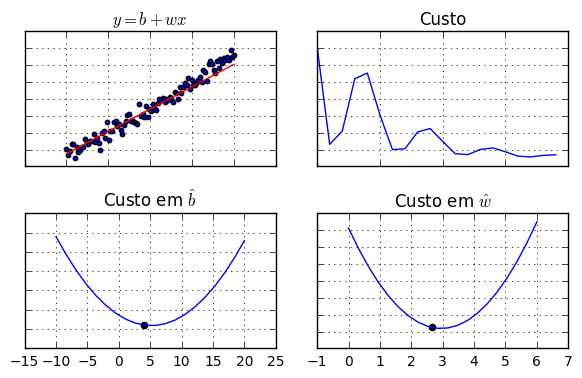

In [28]:
np.random.seed(23)
class linear_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=1000, gamma=0.9, show_learning=False):
        self.learning_rate = learning_rate
        self.training_iters = training_iters
        self.gamma = gamma
        self.show_learning = show_learning
        
    def fit(self, X_train, y_train, plot=False):
        
        # formata os dados
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # para plotar o aprendizado (é preciso conhecer a equação geradora)
        if self.show_learning:
            assert X.shape[1] <= 2 # só é possível viazualizar 2 parâmetros
            self.w1_loss = [L(y_train, 5 + i * X_train) for i in np.linspace(0,6,20)]
            self.b_loss = [L(y_train, i + 3 * X_train) for i in np.linspace(-10,20,20)]
        
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,3, size = X[0].shape)
        
        velocidade =  np.zeros(self.w_hat.shape) # inicia a velocidade
        loss = [] # para plotar o aprendizado
        while self.training_iters > 0:
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for point, yi in zip(X, y_train):
                gradient +=  (point * self.w_hat - yi) * point
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado
            velocidade = (velocidade * self.gamma) + gradient # atualiza a velocidade
            
            # atualiza os parâmetros
            self.w_hat -= velocidade
            
            self.training_iters -= 1 # atualiza a iteração de treino
            l = ((y_train - self.predict(X_train)) ** 2).sum() # calcula o custo
                        
            loss.append(l) # armazeno o custo para gráfico
        
            if self.show_learning:
                # mostra o estado atual do aprendizado
                self._show_state(X_train, y_train, loss) 
            
        
    def predict(self, X_test):
        # formata os dados
        if len(X_test.values.shape) < 2:
            X = X_test.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        return np.dot(X, self.w_hat) 
    
    
    def _show_state(self, X_train, y_train, loss):
        # visualiza o processo de aprendizado
        lb = L(y_train, self.w_hat[0] + 3 * X_train) # calcula o custo na direção b
        lw = L(y_train, 5 + self.w_hat[1] * X_train) # calcula o custo na direção w

        # scatter plot
        plt.subplot(221)
        plt.scatter(X_train, y_train, s= 10)
        plt.plot(X_train, self.predict(X_train), c='r')
        plt.title('$y = b + w x$')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # loss
        plt.subplot(222)
        plt.plot(range(len(loss)), loss)
        plt.title('Custo')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # b_loss
        plt.subplot(223)
        plt.plot( np.linspace(-10,20,20), self.b_loss)
        plt.scatter(self.w_hat[0], lb, c = 'k')
        plt.title('Custo em $\hat{b}$')
        plt.tick_params(labelleft=False)
        plt.grid(True)
        
        # w_loss
        plt.subplot(224)
        plt.plot(np.linspace(0,6,20), self.w1_loss)
        plt.scatter(self.w_hat[1], lw, c = 'k')
        plt.title('Custo em $\hat{w}$')
        plt.grid(True)
        plt.tick_params(labelleft=False)
        
        plt.tight_layout()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico

regr = linear_regr(learning_rate=0.0001, training_iters=20, gamma = 0.8, show_learning=True)
regr.fit(dados['x'], dados['y'])